# 🧠 Machine Learning Engineer Portfolio Project
## Bengaluru House Price Prediction using Regression Models

**Author**: Akshat jha  
**Role**: Machine Learning Engineer  

This project demonstrates the end-to-end workflow of a Machine Learning Engineer, including data preprocessing, feature engineering, model selection, and evaluation for predicting real estate prices in Bengaluru.

# Load the data

# 📥 Load the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')

## 🔍 Initial Data Exploration

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# Cheaking the data and cleaning

## 🧹 Data Cleaning

In [4]:
df.shape

(13320, 9)

In [5]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [6]:
df1 = df.drop(['area_type','availability','balcony','society'],axis=1)

In [7]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [8]:
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df1.dropna(inplace = True)

In [10]:
df1.dtypes

location       object
size           object
total_sqft     object
bath          float64
price         float64
dtype: object

In [11]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
df1['bhk'] =  df1['size'].apply(lambda x : int(x.split(' ')[0]))

In [13]:
df1.dtypes

location       object
size           object
total_sqft     object
bath          float64
price         float64
bhk             int64
dtype: object

In [14]:
df1['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [15]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [16]:
df1[~df1['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [17]:
def convert_sqfeet(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return(float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
        
        

In [18]:
df1['total_sqft'] = df1['total_sqft'].apply(convert_sqfeet)

In [19]:
df1.dtypes

location       object
size           object
total_sqft    float64
bath          float64
price         float64
bhk             int64
dtype: object

In [20]:
df1.drop(['size'],axis = 1,inplace=True)

In [21]:
df1.isnull().sum()

location       0
total_sqft    46
bath           0
price          0
bhk            0
dtype: int64

In [22]:
df1.dropna(inplace=True)

## 🧠 Feature Engineering and Transformation


In [23]:
df1['price_per_sqft'] = df1['price']*100000//df1['total_sqft']

In [24]:
df1

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.0
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.0
2,Uttarahalli,1440.0,2.0,62.00,3,4305.0
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.0
4,Kothanur,1200.0,2.0,51.00,2,4250.0
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.0
13316,Richards Town,3600.0,5.0,400.00,4,11111.0
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.0
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.0


In [25]:
len(df1.location.unique())

1298

In [26]:
location_stats = df1.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats

location
Whitefield             532
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         264
Thanisandra            232
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1298, dtype: int64

In [27]:
type(location_stats)

pandas.core.series.Series

In [28]:
location_stats_less_10 = location_stats[location_stats<=10]

In [29]:
location_stats_less_10

location
Dairy Circle            10
Sadashiva Nagar         10
Nagappa Reddy Layout    10
Kalkere                 10
Naganathapura           10
                        ..
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1058, dtype: int64

In [30]:
df1.location = df1.location.apply(lambda x : 'other' if x in location_stats_less_10 else x)

In [31]:
df1

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.0
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.0
2,Uttarahalli,1440.0,2.0,62.00,3,4305.0
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.0
4,Kothanur,1200.0,2.0,51.00,2,4250.0
...,...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5,6689.0
13316,other,3600.0,5.0,400.00,4,11111.0
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2,5258.0
13318,Padmanabhanagar,4689.0,4.0,488.00,4,10407.0


## 🧼 Outlier Detection and Removal

In [32]:
df2  = df1[~(df1.total_sqft/df1.bhk<300)]

In [33]:
df2.shape

(12456, 6)

In [34]:
len(df2.location.unique())

241

In [35]:
for key,std_out in df2.groupby('location'):
    print('######################',key)
    print('######################',std_out)

######################  Devarachikkanahalli
######################                    location  total_sqft  bath  price  bhk  price_per_sqft
152     Devarachikkanahalli      1250.0   2.0   44.0    3          3520.0
341     Devarachikkanahalli      1250.0   2.0   40.0    2          3200.0
2474    Devarachikkanahalli      1200.0   2.0   83.0    2          6916.0
5030    Devarachikkanahalli      1170.0   2.0   40.0    2          3418.0
5536    Devarachikkanahalli      1200.0   3.0  160.0    3         13333.0
5771    Devarachikkanahalli      1425.0   2.0   65.0    3          4561.0
6591    Devarachikkanahalli       947.0   2.0   43.0    2          4540.0
7536    Devarachikkanahalli      1130.0   2.0   36.0    2          3185.0
7767    Devarachikkanahalli      1417.0   2.0   76.0    3          5363.0
8268    Devarachikkanahalli      1230.0   2.0   58.0    2          4715.0
8954    Devarachikkanahalli      1705.0   3.0   75.0    3          4398.0
9894    Devarachikkanahalli      1116.0   2.0

In [39]:
def pps_outliers(df):
    df_out = pd.DataFrame()
    for key,std_out in df.groupby('location'):
        m = np.mean(std_out.price_per_sqft)
        st = np.std(std_out.price_per_sqft)
        reduced_df = std_out[(std_out.price_per_sqft>(m-st)) & (std_out.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index = True)
    return df_out

In [40]:
df3 = pps_outliers(df1)                                 

In [41]:
df3

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Devarachikkanahalli,1250.0,2.0,44.00,3,3520.0
1,Devarachikkanahalli,1250.0,2.0,40.00,2,3200.0
2,Devarachikkanahalli,1200.0,2.0,83.00,2,6916.0
3,Devarachikkanahalli,1170.0,2.0,40.00,2,3418.0
4,Devarachikkanahalli,1425.0,2.0,65.00,3,4561.0
...,...,...,...,...,...,...
11435,other,812.0,1.0,26.00,1,3201.0
11436,other,1440.0,2.0,63.93,3,4439.0
11437,other,1075.0,2.0,48.00,2,4465.0
11438,other,1200.0,5.0,325.00,4,27083.0


In [50]:

def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
   
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    plt.savefig('scatterplot_after_outlier.png')
    
#plot_scatter_chart(df3,"Rajaji Nagar")



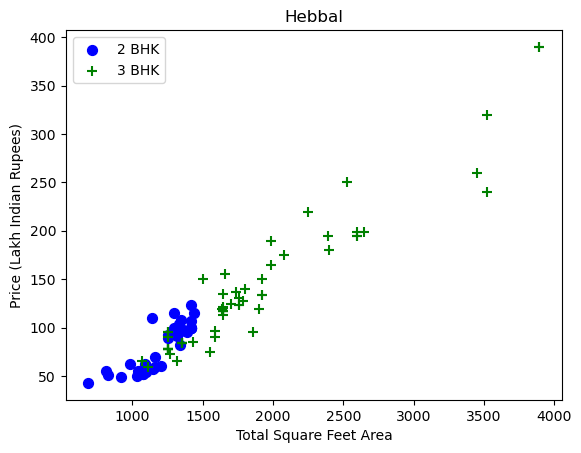

In [49]:
plot_scatter_chart(df3,"Hebbal")


In [44]:


def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df3)
# df8 = df7.copy()
df8.shape



(8010, 6)

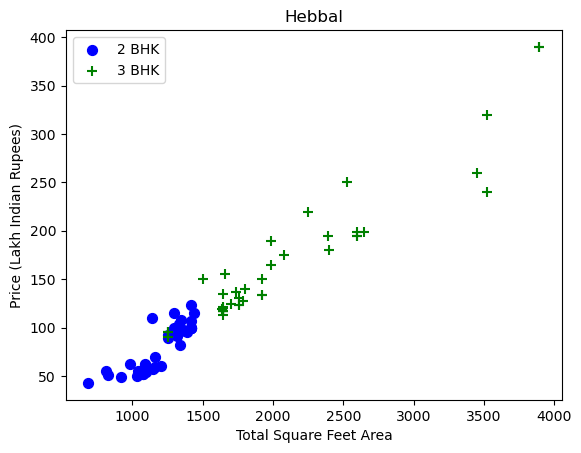

In [51]:
plot_scatter_chart(df8,"Hebbal")


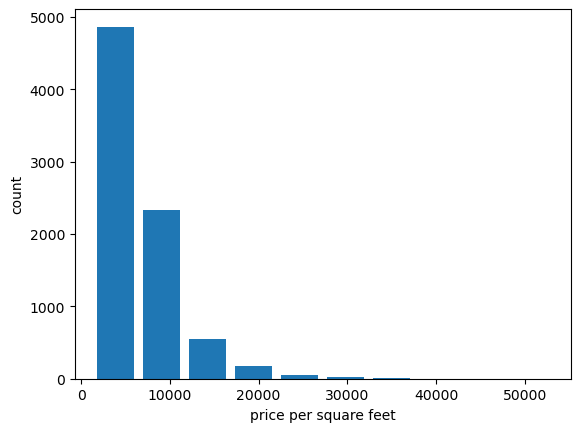

In [52]:
import matplotlib.pyplot as plt
plt.hist(df8.price_per_sqft,rwidth = 0.8)
plt.xlabel('price per square feet')
plt.ylabel('count')
plt.savefig('histplot_price_per_sq_feet_count.png')
plt.show()

## 🤖 Model Training and Evaluation


In [54]:
dummies = pd.get_dummies(df8['location'],dtype=float)

In [55]:
dummies

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11431,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
11438,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [56]:
df9 = pd.concat([df8,dummies.drop('other',axis = 1)],axis=1)

In [57]:
df9

,location,total_sqft,bath,price,bhk,price_per_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,Devarachikkanahalli,1250.0,2.0,40.0,2,3200.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Devarachikkanahalli,1200.0,2.0,83.0,2,6916.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Devarachikkanahalli,1170.0,2.0,40.0,2,3418.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Devarachikkanahalli,1425.0,2.0,65.0,3,4561.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Devarachikkanahalli,947.0,2.0,43.0,2,4540.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11431,other,1400.0,7.0,218.0,7,15571.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11434,other,1353.0,2.0,110.0,2,8130.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11435,other,812.0,1.0,26.0,1,3201.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11438,other,1200.0,5.0,325.0,4,27083.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
df9 = df9.drop(['location'],axis=1)

In [59]:
X = df9.drop(['price'],axis=1)
y = df9['price']

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [61]:
x_train

,total_sqft,bath,bhk,price_per_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
5167,1150.0,2.0,2,4521.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5355,1690.0,3.0,3,6863.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5091,1184.0,2.0,2,5827.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
955,1150.0,2.0,2,5652.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9789,4920.0,5.0,4,23373.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4182,800.0,2.0,2,3750.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1601,1726.0,3.0,3,8400.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5658,1050.0,2.0,2,4571.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9871,1495.0,3.0,3,13377.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
from sklearn.linear_model import LinearRegression


In [63]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.8646091727587315

In [64]:
lr_clf.score(x_train,y_train)

0.8493882321922449

In [65]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.87549652, 0.87563164, 0.7991285 , 0.87077279, 0.84006199])

In [66]:
X

,total_sqft,bath,bhk,price_per_sqft,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2,3200.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1200.0,2.0,2,6916.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1170.0,2.0,2,3418.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1425.0,2.0,3,4561.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,947.0,2.0,2,4540.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11431,1400.0,7.0,7,15571.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11434,1353.0,2.0,2,8130.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11435,812.0,1.0,1,3201.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11438,1200.0,5.0,4,27083.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
y_pred = lr_clf.predict(x_test)

In [68]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8646091727587315

In [69]:
y_pred

array([ 53.03002384,  48.94454296, 101.77729897, ...,  30.48554405,
       137.1568971 , 120.13803498])

In [70]:
y_test

8846      85.0
8480      50.0
5241      90.0
1264      60.0
10585    120.0
         ...  
5430      65.0
4197     110.0
4113      42.0
4066     105.0
6654     119.0
Name: price, Length: 1602, dtype: float64

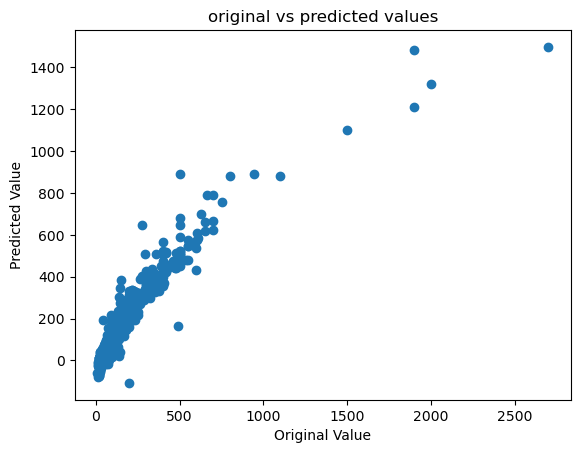

In [72]:
plt.scatter(y_test,y_pred)
plt.xlabel('Original Value')
plt.ylabel('Predicted Value')
plt.title('original vs predicted values')
plt.savefig('scatterplot_predoiction_original.png')

## 💾 Saving and Loading the Trained Model

In [62]:
import joblib

In [64]:
# Save the model
joblib.dump(lr_clf, 'bengaluru_price_model.pkl')

['bengaluru_price_model.pkl']

### We use `joblib` to save our trained regression model for later use. This is especially helpful when deploying the model or sharing it with others.


## Load the model and predict

In [66]:
loaded_model = joblib.load('bengaluru_price_model.pkl')
predictions = loaded_model.predict(x_test)


In [67]:
predictions

array([ 53.03002384,  48.94454296, 101.77729897, ...,  30.48554405,
       137.1568971 , 120.13803498])

## 🔍 Validate the saved model

### To ensure the saved model behaves the same after reloading, we compute the correlation between the predictions before and after saving

 

In [69]:
np.corrcoef(y_pred,predictions)[0,1]

1.0